<a href="https://colab.research.google.com/github/mmarossi/score/blob/main/Score_coord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving Base_Coordenadores.xlsx to Base_Coordenadores (1).xlsx


In [25]:
nome_do_arquivo="Base_Coordenadores.xlsx"

In [26]:
df=pd.read_excel(nome_do_arquivo)
df.head(3)

,codEstab,DescEstab,Centro SAP,Desc. Centro SAP,Matricula,Txt_subárea_HR,Denom_un_org,Denom_grp_empreg,Denom_subgrp_emprg,Texto_sexo,Datadenascimento,Hrs_mês,Data de Admissão,Status do Colaborador,DescrCargo,DescEstabelecimento Regional,CodEmpresa,DescEmpresa,DescMarca,Centro de Custo Descrição,Pessoa com Deficiência?,Status Afastado,CodAfastamento,Motivos,Valdesde,Valaté,Idade,Range Idade,TCasa,Range TCasa,CodSindicato,Sindicato,Chave,Mês,Cidade,Mesref,Instrução,Est EMS,Etnia,Carga Horária,Estado Civil,Entidade,Posição_Success,FTE,Headcount Orçamento,Bairro,UF,CULTURA,DESEMPENHO_TOTAL,EQUIPE,SALÁRIO,POSICIONAMENTO SALARIAL,FAIXA_SAL,NINE_BOX1,NINE_BOX,GPTW_2020,GPTW_2021,TURNOVER,TURNOVER_P,CANAIS_CONDUTA,DATA_MOV,Motivo,MERITOCRACIA,Tcadeira,Tcadeira_anos,Tcargo,NPS,RECEITA_MIL,CLUSTER,META_ORC
0,650361,Angélica II,D121,LV-ANGÉLICA II,1,Angélica II,Atendimento Unidades SP 3,Coordenação,Coordenador,feminino,1992-02-27,220,2014-09-01,Ativo,Coordenador Unidade II,São Paulo,1000,DASA,LAVOISIER,Administração,Não,Ativo,NaN,NaN,NaN,NaN,28,De 26 a 30,75.43,Mais que 5 anos e menos que 10 anos,SINDSP01,SINSAUDESP,50003472,2020-12-01,São Paulo,202012,Ensino Superior,D121,Branca,07-17 2a6 07-11 S 2h (F220164A),Casado(a),01. Reg. SP,60021385,1.22,1,Santa Cecília,SP,100.0,102.266039,0,5691.35,-0.242497,baixa,1 AVALIAR,1.0,81,68,0,0.000000,0.5,2018-09-01,Programa Crescer,NÃO,2018-09-01,2.366667,3 - de 2 a 4 anos,52.900000,8580.43576,GRANDE,0.300000
1,650361,Angélica II,D121,LV-ANGÉLICA II,2,Angélica II,Atendimento Unidades SP 2,Coordenação,Coordenador,masculino,1993-03-03,220,2015-04-23,Ativo,Coordenador Unidade II,São Paulo,1000,DASA,LAVOISIER,Administração,Não,Ativo,NaN,NaN,NaN,NaN,27,De 26 a 30,67.75,Mais que 5 anos e menos que 10 anos,SINDSP09,SIND BIOMEDICOS DE SP,50002746,2020-12-01,São Paulo,202012,Ensino Superior,D121,Branca,07-17 2a6 07-11 S 2h (F220164A),Solteiro(a),01. Reg. SP,60000578,1.22,1,Santa Cecília,SP,104.0,102.266039,0,6262.01,-0.211019,baixa,5 EVOLUIR,5.0,79,68,0,0.000000,0.5,2020-08-01,Mérito,SIM,2020-02-01,0.927778,1 - menos de 1 ano,52.900000,8580.43576,GRANDE,0.300000
2,650361,Angélica II,D121,LV-ANGÉLICA II,3,Angélica II,Unidade Angélica II,Coordenação,Coordenador,feminino,1982-02-27,220,2016-02-01,Ativo,Coordenador Unidade III,São Paulo,1000,DASA,LAVOISIER,Administração,Não,Ativo,NaN,NaN,NaN,NaN,38,De 36 a 45,58.41,Mais que 2 anos e e menos que 5 anos,SINDSP01,SINSAUDESP,50003214,2020-12-01,São Paulo,202012,Pos Graduação / MBA / Mestrado,D121,Branca,07-17 2a6 07-11 (F220026A),Casado(a),01. Reg. SP,60062712,1.22,1,Santa Cecília,SP,100.0,102.266039,85,7025.44,-0.0649329,média,8 EXPANDIR,8.0,58,68,4,0.047059,0.5,2018-07-01,Programa Crescer,SIM,2020-11-01,0.166667,1 - menos de 1 ano,58.816667,8580.43576,GRANDE,0.133333


In [27]:
df.describe()

,codEstab,Matricula,Hrs_mês,CodEmpresa,CodAfastamento,Motivos,Valdesde,Valaté,Idade,TCasa,Chave,Mesref,Posição_Success,FTE,Headcount Orçamento,CULTURA,DESEMPENHO_TOTAL,EQUIPE,SALÁRIO,NINE_BOX,GPTW_2020,GPTW_2021,TURNOVER,TURNOVER_P,CANAIS_CONDUTA,Tcadeira_anos,NPS,RECEITA_MIL,META_ORC
count,44.000000,44.000000,44.000000,44.0,0.0,0.0,0.0,0.0,44.000000,44.000000,4.400000e+01,44.0,4.400000e+01,44.000000,44.0,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,606352.795455,22.500000,215.000000,1000.0,NaN,NaN,NaN,NaN,38.500000,104.654773,5.000450e+07,202012.0,6.001756e+07,1.192727,1.0,98.245455,102.271267,37.636364,6072.256364,3.318182,60.568182,64.181818,1.522727,0.045862,1.977273,4.091667,63.676097,4591.055472,0.372727
std,123819.717652,12.845233,15.994185,0.0,NaN,NaN,NaN,NaN,8.563036,71.242116,4.560879e+03,0.0,1.653731e+04,0.087241,0.0,23.193077,0.667916,43.571962,1336.863582,1.877315,24.399197,27.411823,2.129403,0.068082,5.377553,6.164853,15.179421,2986.984075,0.335566
min,50013.000000,1.000000,165.000000,1000.0,NaN,NaN,NaN,NaN,27.000000,21.320000,5.000262e+07,202012.0,6.000044e+07,0.920000,1.0,0.000000,98.768139,0.000000,3929.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.408333,529.278010,0.000000
25%,650354.000000,11.750000,220.000000,1000.0,NaN,NaN,NaN,NaN,32.000000,54.732500,5.000323e+07,202012.0,6.000336e+07,1.220000,1.0,100.000000,102.266039,11.500000,5267.790000,2.000000,57.000000,64.750000,0.000000,0.000000,0.000000,0.825694,61.625000,2113.032431,0.070833
50%,650377.000000,22.500000,220.000000,1000.0,NaN,NaN,NaN,NaN,38.000000,84.285000,5.000348e+07,202012.0,6.001112e+07,1.220000,1.0,103.600000,102.266039,22.500000,5788.820000,4.000000,68.000000,72.000000,1.000000,0.026149,0.000000,1.608333,68.000000,3704.181821,0.300000
75%,650398.250000,33.250000,220.000000,1000.0,NaN,NaN,NaN,NaN,43.000000,129.292500,5.000348e+07,202012.0,6.003029e+07,1.220000,1.0,106.900000,102.266039,45.750000,7048.627500,5.000000,75.500000,81.000000,2.000000,0.062784,1.000000,2.693056,72.033333,7341.623946,0.400000
max,680411.000000,44.000000,220.000000,1000.0,NaN,NaN,NaN,NaN,61.000000,292.300000,5.002491e+07,202012.0,6.006271e+07,1.220000,1.0,115.000000,104.130000,208.000000,9256.670000,8.000000,94.000000,96.000000,10.000000,0.375000,33.000000,24.761111,81.400000,10244.110720,1.000000


In [28]:
df['GR_GPTW'] = np.where(df['GPTW_2021'] >= 81, 3, np.where(
    df['GPTW_2021'] < 64.75, 0.75, 1.5))

df['GR_CULTURA'] = np.where(df['CULTURA'] >= 106.9, 2, np.where(
    df['CULTURA'] < 100, 0, 1.0))

df['GR_TURNOVER'] = np.where(df['TURNOVER_P'] >= 20, 0, np.where(
    df['TURNOVER_P'] < 6, 2, 1))

df['GR_EQUIPE'] = np.where(df['EQUIPE'] >= 45, 1, np.where(
    df['EQUIPE'] < 11, 0, 0.5))

In [29]:
df['GR_9BOX'] = np.where(df['NINE_BOX'] == 9, 3, np.where(
    df['NINE_BOX'] == 8, 2.75, np.where(df['NINE_BOX'] == 7, 2.5, np.where(df['NINE_BOX'] == 6, 2.25,np.where(
        df['NINE_BOX'] == 5, 2, np.where(df['NINE_BOX'] == 4, 1.75, np.where(df['NINE_BOX'] == 3, 1.5, np.where(
            df['NINE_BOX'] == 2, 1.25, np.where(df['NINE_BOX'] == 1, 1, 0)))))))))

In [30]:
df['NF_PESSOAS']= df['GR_GPTW']+df['GR_TURNOVER']+df['GR_9BOX']

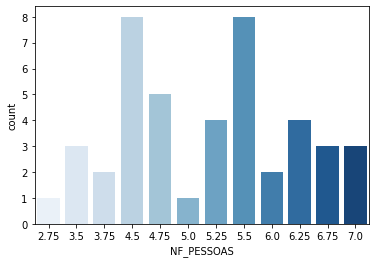

In [31]:
import seaborn as sns
sns.countplot(x='NF_PESSOAS', palette="Blues", data=df);

In [32]:
df['GR_NPS'] = np.where(df['NPS'] >= 72.0, 4, np.where(
    df['NPS'] < 61.8, 0, 2))

In [33]:
df['GR_ORCAMENTO'] = np.where(df['META_ORC']  > 0.80, 6, np.where((df['META_ORC'] > 0.70) & (df['META_ORC'] < 0.80), 5, np.where(
    (df['META_ORC']> 0.60) & (df['META_ORC'] < 0.70), 4, np.where((df['META_ORC']> 0.40) & (df['META_ORC'] < 0.60), 3, np.where(
        (df['META_ORC']> 0.20) & (df['META_ORC'] < 0.40), 2, np.where((df['META_ORC']> 0.01) & (df['META_ORC'] < 0.20), 1, 0))))))

In [34]:
df['NF_NEGOCIOS']= df['GR_NPS']+df['GR_ORCAMENTO']

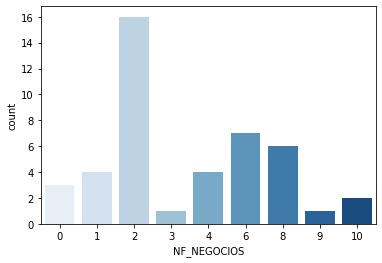

In [35]:
sns.countplot(x='NF_NEGOCIOS', palette="Blues", data=df);

In [36]:
df['NF_GERAL']= df['NF_PESSOAS']+df['NF_NEGOCIOS']

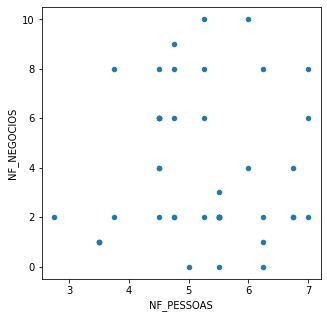

In [37]:
df.plot.scatter('NF_PESSOAS', 'NF_NEGOCIOS', figsize=(5,5))

In [38]:
md_pessoas = df.NF_PESSOAS.mean()
md_negocios = df.NF_NEGOCIOS.mean()

In [39]:
pessoas = df.NF_PESSOAS
negocios = df.NF_NEGOCIOS

quadrante1 = (pessoas <= md_pessoas) & (negocios <= md_negocios)
quadrante2 = (pessoas > md_pessoas) & (negocios <= md_negocios)
quadrante3 = (pessoas > md_pessoas) & (negocios > md_negocios)
quadrante4 = (pessoas <= md_pessoas) & (negocios > md_negocios)

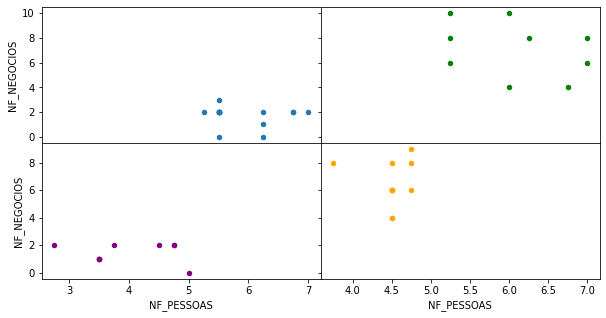

In [40]:

fig, ax = plt.subplots(2,2, figsize=(10,5), sharex='col', sharey='row')
plt.subplots_adjust(wspace=0, hspace=0)

df1 = df[quadrante1]
df1.plot.scatter('NF_PESSOAS', 'NF_NEGOCIOS', ax = ax[1,0], color='purple')

df2 = df[quadrante2]
df2.plot.scatter('NF_PESSOAS', 'NF_NEGOCIOS', ax = ax[0,0])

df3 = df[quadrante3]
df3.plot.scatter('NF_PESSOAS', 'NF_NEGOCIOS', ax = ax[0,1], color='green')

df4 = df[quadrante4]
df4.plot.scatter('NF_PESSOAS', 'NF_NEGOCIOS', ax = ax[1,1], color='orange')